In [1]:
# pyplot for plotting
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [127]:
car_mean = 2
bank = stats.poisson(car_mean)


<BarContainer object of 9 artists>

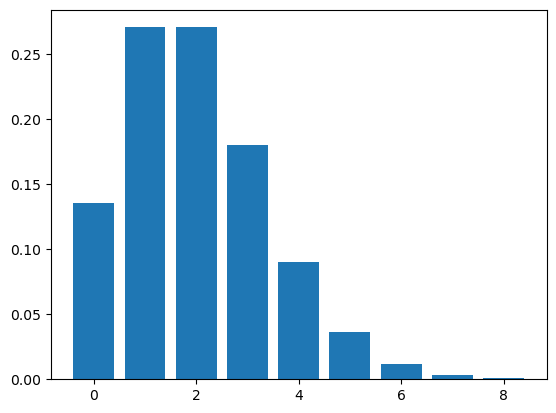

In [3]:
x = np.arange(0,9)
y = [bank.pmf(i) for i in x]
plt.bar(x,y)

In [4]:
bank.pmf(0)

0.1353352832366127

In [5]:
bank.sf(2)

0.3233235838169364

In [128]:
bank.sf(0)

0.8646647167633873

---

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [7]:
grade_mean = 3
grade_std = .3
grades = stats.norm(3,.3)

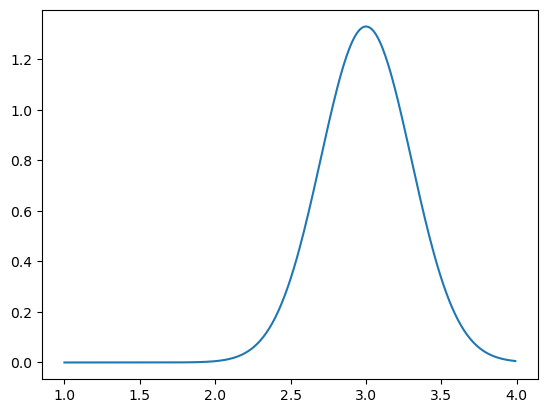

In [19]:
a = np.arange(1,4,.01)
b = [grades.pdf(i) for i in a]
plt.plot(a,b)
plt.show()

In [9]:
grades.ppf(.95) # or grades.isf(.05)

3.4934560880854417

In [10]:
# need at least a 3.5 in order to be in top 5%
grades.sf(3.5)

0.047790352272814696

In [11]:
grades.ppf(.15)

2.689069983151863

In [129]:
grades.sf(2.8) # yes they are in the 3rd decile

0.7475074624530773

---

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [12]:
97 / 4326 * 100

2.2422561257512714

In [13]:
avgclick = .02
clicks = stats.binom(4326, .02)


In [130]:
clicks.pmf(97) * 100

2.194293045437546

In [131]:
clicks.sf(96) * 100
# 11.78

13.975823631416299

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [34]:
test = stats.binom(60,.01)

In [134]:
test.sf(0)

0.45284335760923855

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [41]:
.9*22
# 60 students a day
# .03 chance it gets cleaned
# two days is 120 students
7*60
# 420 students is a week

420

In [137]:
# Chances of getting cleaned in a day
breakarea = stats.binom(60,.03)
breakarea.sf(0)

0.8391933309784231

In [136]:
breakarea = stats.binom(120,.03)
breakarea.sf(0) # breakarea.pmf(0) is the same but opposite return

0.974141215198185

In [138]:
breakarea = stats.binom(300,.03)
breakarea.sf(0) # breakarea.pmf(0) is the same but opposite return

0.999892472318951

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
# Lunch = 60
# mean time = 30 min
# std time = 6 min
# wait time for food = 10 min
# my order = 2 min

In [67]:
lapan = stats.norm(30,6)

In [142]:
lunch = 60
wait = 10
ordering = 2
time_bank = lunch - wait - ordering
time_bank = time_bank - 15

In [144]:
lapan.cdf(time_bank)

0.6914624612740131

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [155]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
employees = pd.read_sql('SELECT * FROM salaries s WHERE s.to_date > now()', url)

In [156]:
print(employees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     240124 non-null  int64 
 1   salary     240124 non-null  int64 
 2   from_date  240124 non-null  object
 3   to_date    240124 non-null  object
dtypes: int64(2), object(2)
memory usage: 7.3+ MB
None


In [157]:
emp_µ, emp_σ = employees['salary'].mean(), employees['salary'].std()

In [158]:
emp_σ

17309.995380252043

In [159]:
salaries = stats.norm(emp_µ, emp_σ)

In [160]:
salaries.cdf(60000)

0.24385742480214506

In [161]:
salaries.sf(94999)

0.09209773465617149

Found percentages of 65000 - 80000 individually and added the difference to calculate the range

In [162]:
salaries.cdf(65000)

0.342702921950652

In [163]:
salaries.cdf(80000)

0.6777634904953175

In [164]:
#OR salaries.cdf([65000,80000])

In [165]:
# 33% of employees make within 65000-80000

In [166]:
salaries.ppf(.95)

100484.64454102785